<a href="https://colab.research.google.com/github/soodeh-nilforoushan/NLP-Basics/blob/main/2_Count_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet


In [3]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

The goal of this data set is to classify the documents. For example, there's the business section, entertainment, politics, sports and so forth.

Note that this will be a supervised task since we will be given the labels.

In [4]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


--2023-09-11 01:29:53--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  4.30MB/s    in 1.1s    

2023-09-11 01:29:55 (4.30 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [5]:
df=pd.read_csv("bbc_text_cls.csv")

In [6]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [7]:
inputs=df["text"]
labels=df["labels"]

<Axes: >

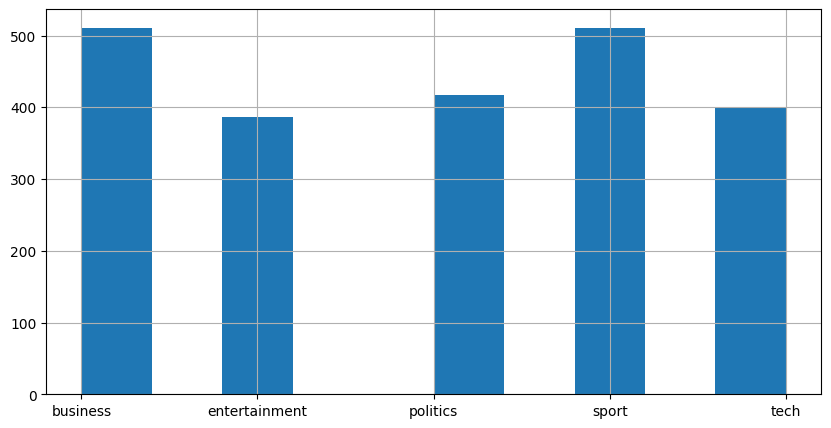

In [8]:
labels.hist(figsize=(10,5))
# we can see we do not have imbalanced dataset

In [9]:
inputs_train, inputs_test, Ytrain, Ytest=train_test_split(
    inputs,labels,random_state=123
)

In [10]:
vectorizer=CountVectorizer()

In [11]:
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest=vectorizer.transform(inputs_test)
#The test data is supposed to represent what we have when we apply our model to data we haven't seen

In [12]:
print(Xtrain.toarray())

[[0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


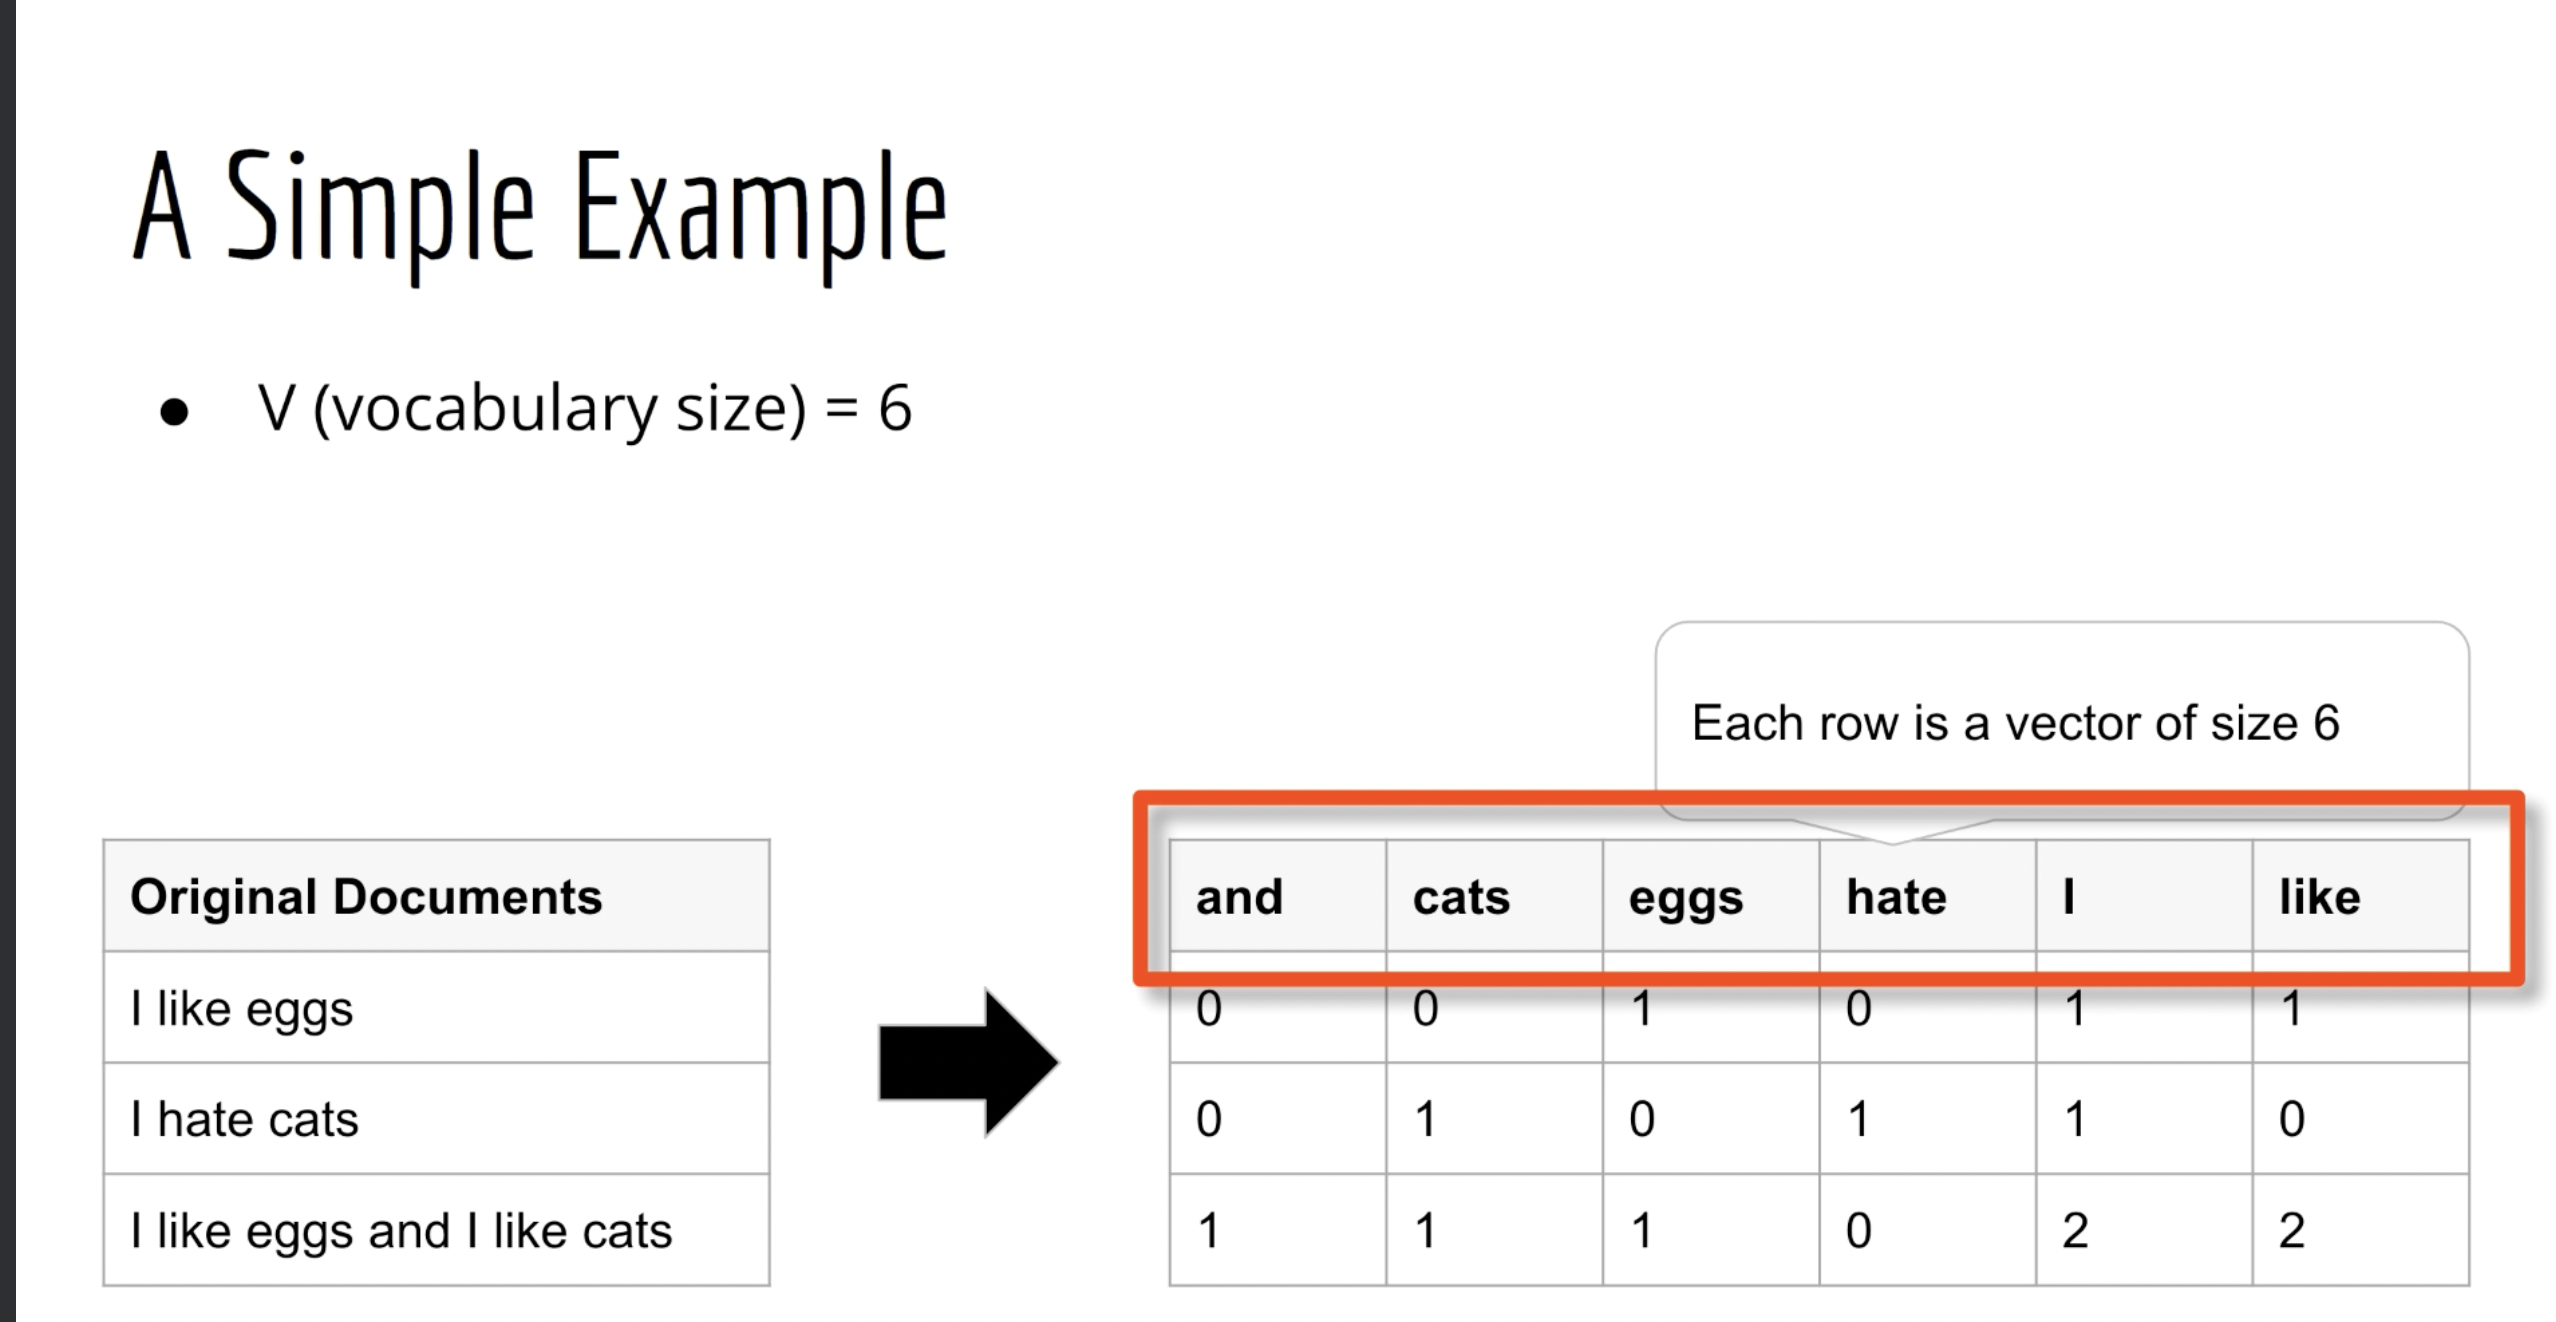

In [13]:
Xtrain.shape
#Note that this is typically very undesirable in machine learning.
#We normally like to have many more rows compared to columns, as you'll see.

(1668, 26287)

In [14]:
print(Xtrain)
# input data is text, but machine learning only works on numbers.
# We have just converted our text into vectors of numbers.

  (0, 25718)	3
  (0, 21493)	3
  (0, 12374)	1
  (0, 23988)	3
  (0, 5212)	1
  (0, 21184)	1
  (0, 11348)	2
  (0, 7951)	1
  (0, 22558)	1
  (0, 24876)	2
  (0, 23660)	37
  (0, 16720)	22
  (0, 16742)	1
  (0, 7766)	2
  (0, 9546)	1
  (0, 5674)	1
  (0, 4372)	4
  (0, 22926)	1
  (0, 22005)	1
  (0, 10798)	6
  (0, 7101)	3
  (0, 11106)	3
  (0, 7872)	1
  (0, 16588)	2
  (0, 3282)	2
  :	:
  (1667, 19170)	1
  (1667, 2264)	1
  (1667, 3035)	1
  (1667, 6338)	1
  (1667, 15643)	1
  (1667, 21196)	1
  (1667, 4036)	1
  (1667, 7300)	1
  (1667, 5939)	1
  (1667, 22654)	1
  (1667, 6710)	1
  (1667, 12566)	1
  (1667, 3071)	1
  (1667, 7942)	1
  (1667, 16419)	1
  (1667, 24351)	1
  (1667, 5026)	1
  (1667, 3352)	1
  (1667, 9941)	1
  (1667, 5583)	1
  (1667, 16385)	1
  (1667, 3884)	1
  (1667, 17331)	1
  (1667, 10661)	1
  (1667, 9618)	1


In [15]:
#gives us non-zerp values
(Xtrain !=0 ).sum()
#This gives us a Boolean matrix with 1, where the value is non-zero and 0.

337411

In [16]:
#what percentage of values are non-zero?
(Xtrain !=0 ).sum() / np.prod(Xtrain.shape)

0.007695239935415004

 as you can see, less than one percent of the Matrix contains non-zero values, thus we are justified in using a sparse representation.

In [17]:
#start doing usual machine learning steps.
model=MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest, Ytest))

train score 0.9922062350119905
test score 0.9712746858168761


In [18]:
#with stop words
vectorizer=CountVectorizer(stop_words="english")
Xtrain=vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest,Ytest))

train score 0.9928057553956835
test score 0.9766606822262118


In [19]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith("J"):
    return wordnet.ADJ
  elif treebank_tag.startswith("V"):
    return wordnet.VERB
  elif treebank_tag.startswith("N"):
    return wordnet.NOUN
  elif treebank_tag.startswith("R"):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [20]:
#What do we want to do is create an object and then we want to be able to call that object as if it werea function.
class LemmaTokenizer:
  def __init__(self):
    self.wnl=WordNetLemmatizer()
  def __call__(self,doc):
    tokens=word_tokenize(doc)
    words_and_tags=nltk.pos_tag(tokens)
    return[self.wnl.lemmatize(word, pos=get_wordnet_pos(tag))\
           for word, tag in words_and_tags]

#The output of this is a list containing each lemmatizers the word in the input document.

In [21]:
#with lemmatokenizer
vectorizer=CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest=vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest,Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score 0.9922062350119905
test score 0.9676840215439856


So the next experiment in the script is to try stemming, as you recall, stemming is a more crude version of lammitization.

In [22]:
class StemTokenizer:
  def __init__(self):
    self.porter=PorterStemmer()
  def __call__(self,doc):
    tokens=word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [23]:
#with stemming
vectorizer=CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest=vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest,Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score 0.9892086330935251
test score 0.9694793536804309


In [1]:
def simple_tokenizer(s):
  return s.split()

In [26]:
#String split tokenizer
vectorizer= CountVectorizer (tokenizer=simple_tokenizer)
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)
model=MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest,Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score 0.9952038369304557
test score 0.9712746858168761


this is a sign that a simple string split is a reasonable choice.


We've learned that it's not at all clear which method will perform best before you even try. Oftentimes, people assume that the most complex method will perform best. In this case, that was limitation. But what we saw was there.

This, in fact, led to the worst performance out of all the experiments we tried.

However, also note that this was just for a single instance of the experiment.